In [131]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [132]:
# init dataframe
df = pd.read_csv("loan_applications.csv")
df

,race,credit_score,zipcode,will_default
0,hispanic,498,71202,False
1,white,812,71204,False
2,white,604,71203,True
3,black,339,71207,True
4,hispanic,582,71205,False
...,...,...,...,...
5026,white,644,71202,False
5027,asian,697,71200,False
5028,black,496,71207,True
5029,black,666,71200,False


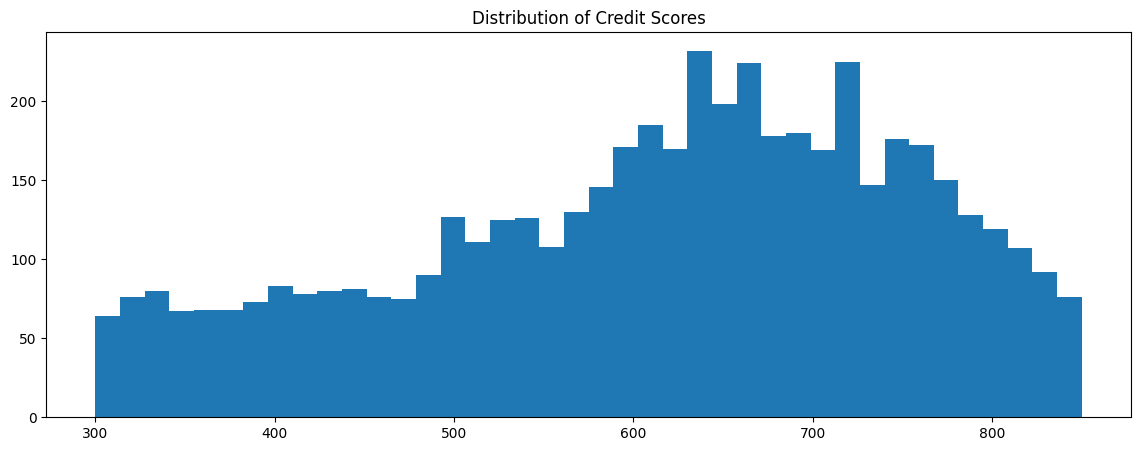

In [133]:
# plot didstribution of dataset
plt.rcParams["figure.figsize"] = [14,5]
plt.title("Distribution of Credit Scores")
plt.hist(df['credit_score'], bins=40)
plt.show()

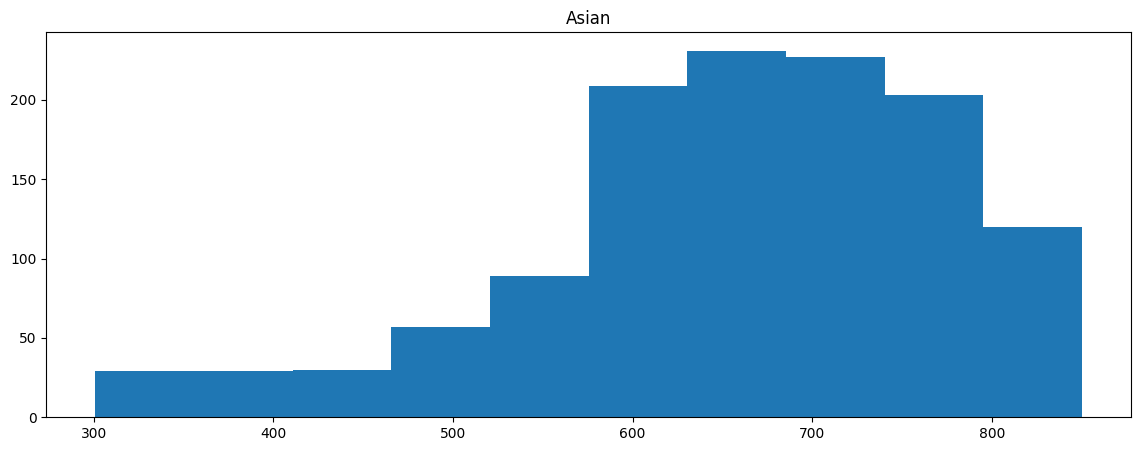

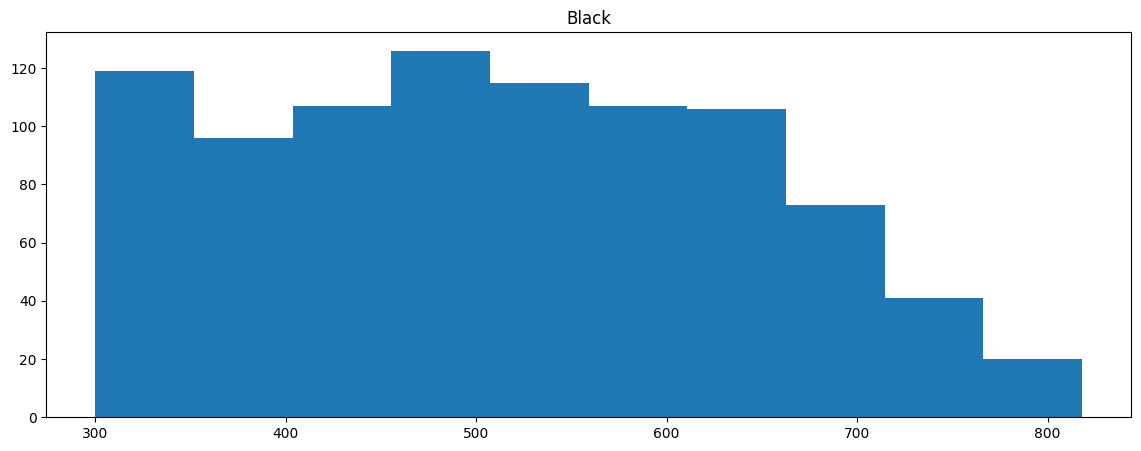

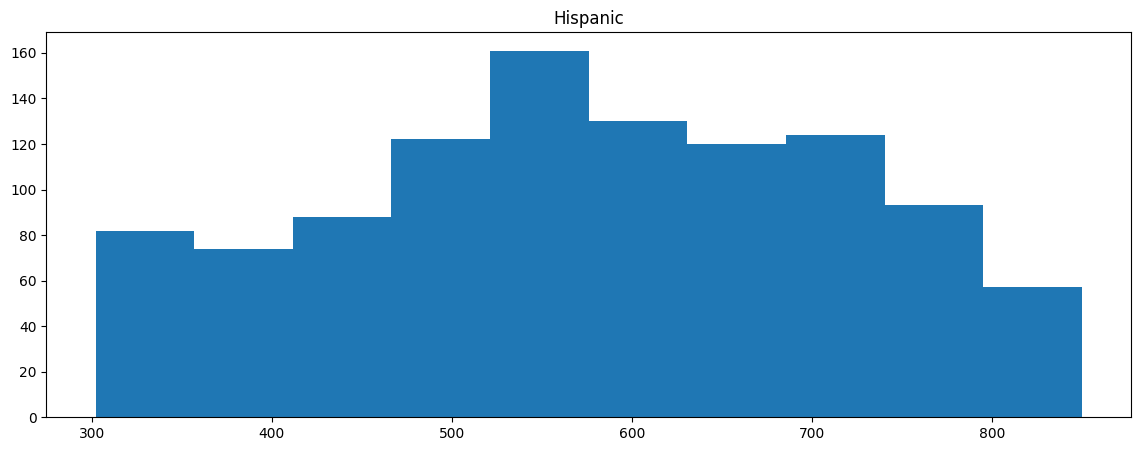

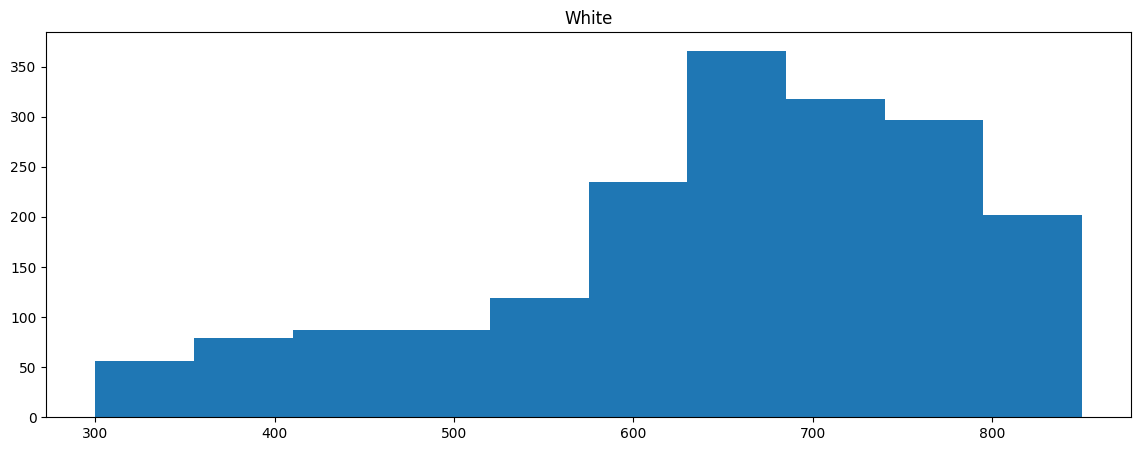

In [134]:
# show by plots by race
for race in sorted(df['race'].unique()):
    plt.title(race.capitalize())
    plt.hist(df[df['race']==race]['credit_score']),
    plt.show()

In [135]:
# crosstab_result = pd.crosstab(index=df['zipcode'], columns=df['race'])
# crosstab_result.plot().bar()

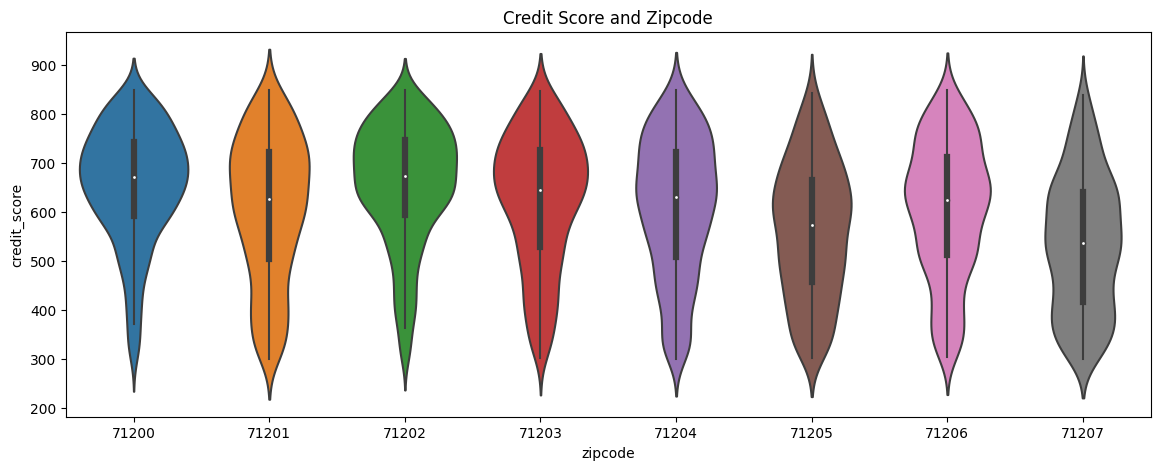

In [136]:
plt.title("Credit Score and Zipcode")
sns.violinplot(data=df, x='zipcode', y='credit_score' )
plt.show()

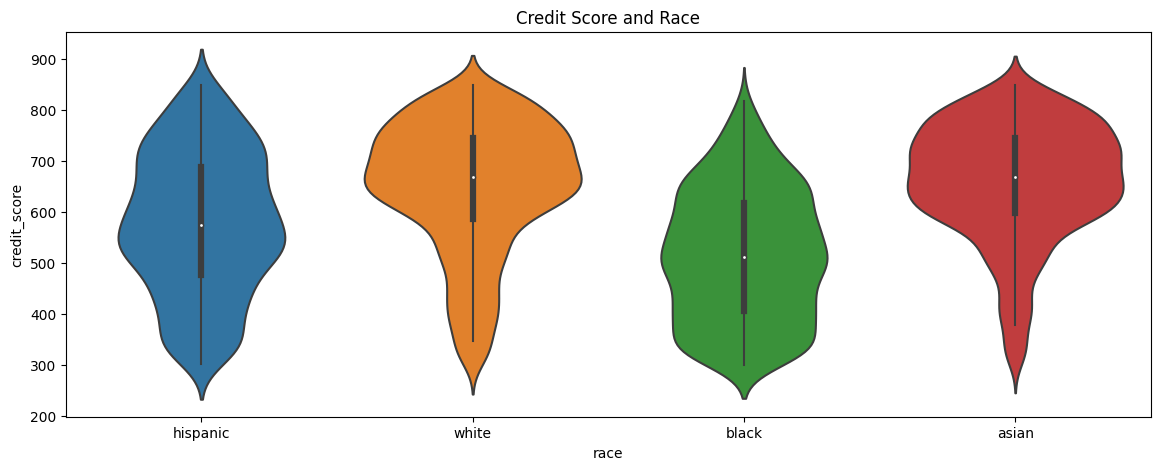

In [137]:
plt.title("Credit Score and Race")
sns.violinplot(data=df, x='race', y='credit_score' )
plt.show()

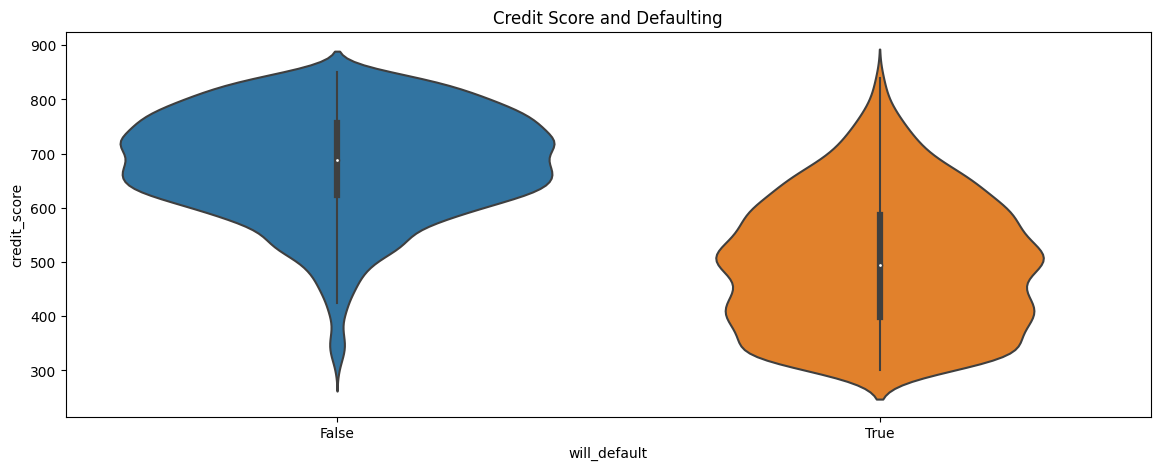

In [138]:
import seaborn as sns
plt.title("Credit Score and Defaulting")
sns.violinplot(data=df, x='will_default', y='credit_score' )
plt.show()


In [139]:
# crosstab_result = pd.crosstab(index=df['will_default'], columns=df['race'])
# crosstab_result.plot().bar()

In [140]:
df["should_approve"]= df["will_default"]==False
df["is_creditworthy"]= df["will_default"]==False
def get_accuracy(predictions, correct):
    return sum(predictions==correct)/len(predictions)
    

In [141]:
correct = np.array([1,1,0,0])
predictions = np.array([1,1,1,0])
print("Accuracy", get_accuracy(predictions,correct))

Accuracy 0.75


In [142]:
def predict(credit_score, threshold):
    return credit_score>threshold

In [143]:
steps = 100
threshold = 300
x = df['credit_score']
y = df['is_creditworthy']
initial_predictions = predict(x, threshold)
accuracy = get_accuracy(initial_predictions, y)
print("Model accuracy for getting a loan: ", round(accuracy,2))

Model accuracy for getting a loan:  0.62


In [144]:
# how much are we changing our guess values
learning_rate = 5

In [145]:
for i in range(steps):
    original_threshold = threshold
    higher_threshold = threshold + learning_rate

    higher_threshold_predictions = predict(x, higher_threshold)
    higher_threshold_accuracy = get_accuracy(higher_threshold_predictions, y)
    print(f"If our threshold was {higher_threshold} then our accuracy would be {round(higher_threshold_accuracy,4)}")

    if higher_threshold_accuracy>accuracy:
        print("Increasing threshold")
        accuracy = higher_threshold_accuracy
        threshold = higher_threshold
    learning_rate*=0.95
    if original_threshold == threshold:
        print("Didn't update threshold; finishing learning")
        break
    print(f"In {i} steps")

If our threshold was 305 then our accuracy would be 0.6281
Increasing threshold
In 0 steps
If our threshold was 309.75 then our accuracy would be 0.6311
Increasing threshold
In 1 steps
If our threshold was 314.2625 then our accuracy would be 0.6365
Increasing threshold
In 2 steps
If our threshold was 318.549375 then our accuracy would be 0.639
Increasing threshold
In 3 steps
If our threshold was 322.62190625 then our accuracy would be 0.6434
Increasing threshold
In 4 steps
If our threshold was 326.4908109375 then our accuracy would be 0.6484
Increasing threshold
In 5 steps
If our threshold was 330.16627039062496 then our accuracy would be 0.6516
Increasing threshold
In 6 steps
If our threshold was 333.6579568710937 then our accuracy would be 0.6537
Increasing threshold
In 7 steps
If our threshold was 336.975059027539 then our accuracy would be 0.6575
Increasing threshold
In 8 steps
If our threshold was 340.126306076162 then our accuracy would be 0.6609
Increasing threshold
In 9 steps
I

In [146]:
print(threshold)

385.0109745951183


In [147]:
# predict(credit_score, threshold)
predict(659, threshold)

True

In [148]:
# Predictions on whether you should give this person a loan
# predict(credit_score, threshold)
predict(700, threshold) 

True

- Learning rate of 100
    - Threshold: 600
    - Highest Accuracy: 0.8000
    - Number of Steps: 2 Steps
- Learning rate of 50
    - Threshold: 600
    - Highest Accuracy: 0.8168
    - Number of Steps: 4 Steps
- Learning rate of 5
    - Threshold: 600
    - Highest Accuracy: 0.8168
    - Number of Steps: 45 Steps

# if initial learning rate = 20, but every time we take a step we reduce learning rate by 5%
- Learning rate of 20
    - Threshold: 600
    - Highest Accuracy: 0.7001
    - Number of Steps: 36 Steps
